# 💻 Praktikum 2
Klasifikasi SVM dengan Data Dummy Non-Linier

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

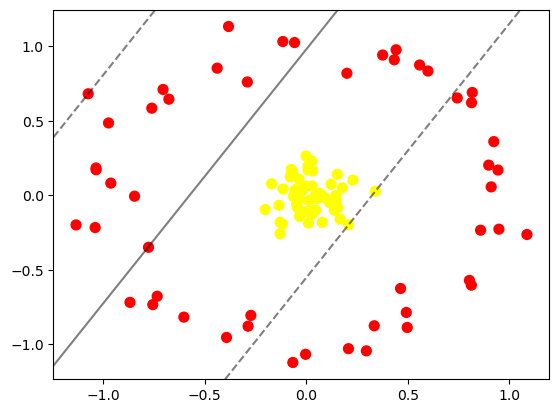

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    # compute radial feature for the third axis
    r = np.exp(-(X[:, 0]**2 + X[:, 1]**2))
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.67661805,  0.64522367],
       [ 0.12161493,  0.07377306],
       [ 0.14643306, -0.04248007],
       [ 0.17583402,  0.04943527],
       [ 0.49207999, -0.78681925],
       [-1.03522911,  0.18326398],
       [ 0.92270143,  0.36020393],
       [ 0.01239764, -0.03429879],
       [ 0.08783303, -0.0133936 ],
       [ 0.80273126, -0.57157432],
       [ 0.14408606, -0.00348647],
       [-0.84570765, -0.0062909 ],
       [ 0.49655662, -0.88759355],
       [-0.76061548,  0.58472215],
       [-0.07790776,  0.12968487],
       [ 0.15367331, -0.08246081],
       [-0.06302982, -0.00760507],
       [-0.00361304, -1.06777055],
       [ 0.43283016,  0.9095725 ],
       [ 0.94345603,  0.16930427],
       [-0.06653731,  0.15494242],
       [ 0.07808607, -0.18132206],
       [ 1.08587193, -0.26348222],
       [ 0.16604135, -0.15985758],
       [-1.07387224,  0.68140266],
       [-0.12950616, -0.18136762],
       [ 0.33417564, -0.87620216],
       [

## Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

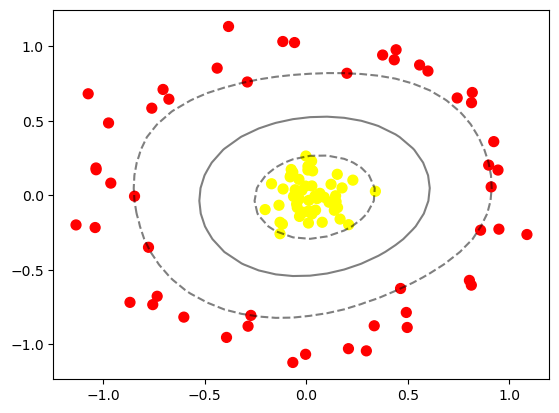

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')